# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings  
warnings.filterwarnings(action="ignore")


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet(r'D:\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [102]:
# from google.colab import drive
# drive.mount('/content/drive')

In [97]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'D:\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir(r'D:\trip_records')

# initialise an empty dataframe
df = pd.DataFrame()
df_1 = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_1=pd.read_parquet(file_path)
        df_1["Date"] = df_1["tpep_pickup_datetime"].dt.date
        df_1["Hour"] = df_1["tpep_pickup_datetime"].dt.hour
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        hour_data = pd.DataFrame()
        sample = pd.DataFrame()
        
        # Loop through dates and then loop through every hour of each date
        for each_date in df_1["Date"].unique():
            rows_for_date = df_1[df_1["Date"] == each_date]
            # Iterate through each hour of the selected date
            for hour_of_day in range(24):
                hour_data = rows_for_date[rows_for_date["Hour"] == hour_of_day] 
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data=pd.concat([sampled_data, sample], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data], ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [101]:
df.info() # checking the details of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [103]:
# Store the df in csv/parquet
df.to_parquet('Sampled_data_all.parquet',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [225]:
# Load the new data file
df=pd.read_parquet('Sampled_data_all.parquet')

In [226]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         Date  Hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [229]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

#dropped the column “store_and_fwd_flag”, as it does not seem to be necessary for analysis
df.drop(columns=["store_and_fwd_flag"], inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [234]:
# Combine the two airport fee columns

#Before combining , handle the NaN/missing values in both the airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0)
df['Airport_fee'] = df['Airport_fee'].fillna(0)

#Combining the two airport fee columns
df["airport_fee"] = df["airport_fee"] + df["Airport_fee"]

# Dropping the extra Aiport_fee Column as it is not needed after the above operation.
df.drop(columns=["Airport_fee"], inplace=True)

# Displaying  the dataframe after combining and removing the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  Date                  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [235]:
# check where values of fare amount are negative
(df["fare_amount"] < 0).sum()

0

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

#For the fare_amount , as we see above , I did not get any negative values from the sampled data .
#So, as a consequence, it is not feasible to analyze RatecodeID for negative fare amounts

In [236]:
# Find which columns have negative values

#Retrieving all numerical columns 
cols_neg_values = df.select_dtypes(include=["int32", "float64"])

#Finding which columns among the above have negative values
neg_val_cnt = (cols_neg_values < 0).sum()

#Printing columns that ave negative values 
print("    Columns     negative value count: ")
print(neg_val_cnt)

    Columns     negative value count: 
passenger_count           0
trip_distance             0
RatecodeID                0
fare_amount               0
extra                     3
mta_tax                  73
tip_amount                0
tolls_amount              0
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
Hour                      0
dtype: int64


In [237]:
# fix these negative values

#Assembling all columns with negative value to fix_neg_on_cols
fix_neg_on_cols = ["mta_tax", "improvement_surcharge", "total_amount", "congestion_surcharge", "extra","airport_fee"]

#using clip method to update the column values to restrict those zero
df[fix_neg_on_cols] = df[fix_neg_on_cols].clip(lower=0)

#Retrieving all numerical columns after fixing the negative values
cols_neg_values = df.select_dtypes(include=["int32", "float64"])
neg_val_cnt = (cols_neg_values < 0).sum()

#Printing columns where we fixed th e negative values
print("    Columns      negative values fixed: ")
print(neg_val_cnt)

    Columns      negative values fixed: 
passenger_count          0
trip_distance            0
RatecodeID               0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
Hour                     0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [238]:
# Find the proportion of missing values in each column
missing_val_prop=df.isna().sum()/len(df)

#Displaying the proportion 
print(missing_val_prop)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
airport_fee              0.000000
Date                     0.000000
Hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [239]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

#Displaying the rows from passenger_count , having null values
df[df["passenger_count"].isna()].head()

#Continued in next cell 

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42         2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43         2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4           19.24         NaN            66           107             0   
15          10.77         NaN           151           106             0   
42           4.52         NaN           114           262             0   
43           9.19         NaN           239           256             0   
46           2.74         NaN            90            48             0   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4         25.64    0.0      0.5        5.93          0.00   
15        45.38    0.0      0.5       11.19          6.55   
42        25.38    0.0      0.5        0.00          0.00   
43        40.00    0.0      0.5        2.20          0.00   
46        18.48    0.0      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
4                     1.0         35.57                   NaN          0.0   
15                    1.0         67.12                   NaN          0.0   
42                    1.0         29.38                   NaN          0.0   
43                    1.0         46.20                   NaN          0.0   
46                    1.0         25.85                   NaN          0.0   

          Date  Hour  
4   2023-01-01     0  
15  2023-01-01     0  
42  2023-01-01     0  
43  2023-01-01     0  
46  2023-01-01     0

In [242]:
#2.2.2 continued - Imputing NaN values in 'passenger_count' with median()
df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].median())

#Also handling rows with passenger_count 0
psgr_nonzero_count = df.loc[df["passenger_count"] != 0, "passenger_count"].median()

# Replace zeros with the median val
df["passenger_count"] = df["passenger_count"].replace(0, psgr_nonzero_count)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [244]:
# Fix missing values in 'RatecodeID'

#Fixing missing values in 'RatecodeID' using mode, as RateodeID is a un-ordered categorical variable and hence 
#it would be ideal to fix this using mode
df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])

#check if missing values are fixed  
df["RatecodeID"].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [246]:
# handle null values in congestion_surcharge
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0])

#check if null values are fixed 
df["congestion_surcharge"].isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [200]:
# Handle any remaining missing values

#There are no other missing values, I have handled all of those above.

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
Date                     0
Hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

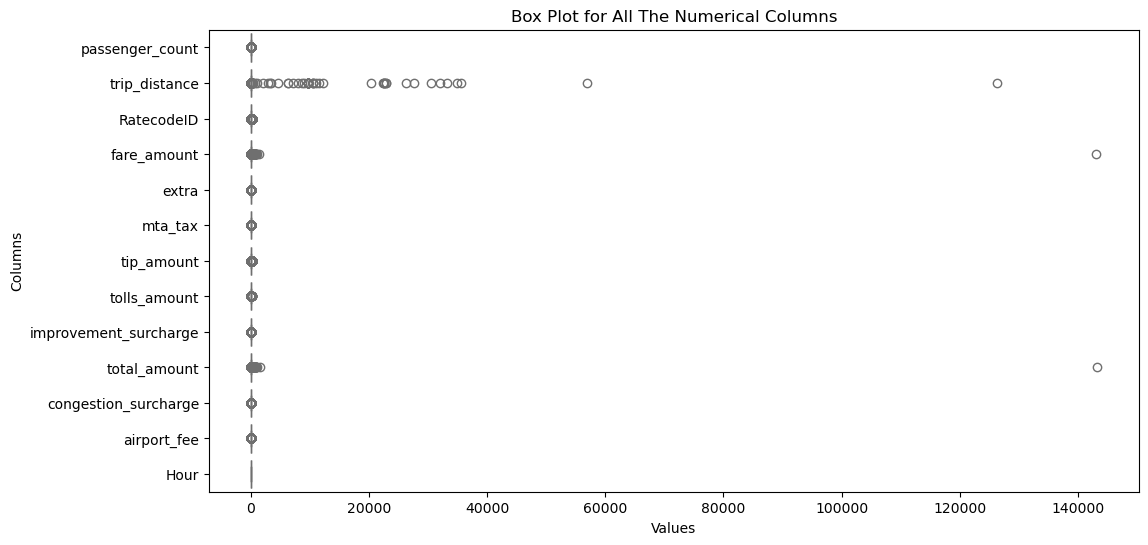

In [249]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

#Retrieving all the numerical columns 
numeric_df = df.select_dtypes(include=["int32", "float64"])

# Convert the dataframe using melt format to make it suitable for plotting using seaborn
numeric_df_melt = numeric_df.melt(var_name="Columns", value_name="Values")

# Using box plot to find out the outliers across all columns of the df
plt.figure(figsize=(12, 6))
sns.boxplot(y="Columns", x="Values", data=numeric_df_melt, palette="pastel")
plt.title("Box Plot for All The Numerical Columns")
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [252]:
# remove passenger_count > 6

#Chekcing the value_counts for the passenger_count
df["passenger_count"].value_counts()

#removing passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [257]:
# Continue with outlier handling

#Fixing outliers for the case of trip_distance is nearly 0 and fare_amount is more than 300

#setting the cap/max value for the near zero context
near_zero_cap=0.01

#Eliminating the near zero values from the trip_distance and hence the df
df = df[~((df["trip_distance"] < near_zero_cap) & (df["fare_amount"] > 300))]

#Continued for other cases in next cell

(1896345, 20)

In [260]:
# Continue with outlier handling-2
#Fixing outliers for the case where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))] 

#Continued for other cases in next cell

(1896282, 20)

In [263]:
# Continue with outlier handling-3
#Fixing outliers for the case where trip_distance is more than 250 miles.
df=df[~(df["trip_distance"] > 250)]

#Continued for other cases in next cell

(1896236, 20)

In [272]:
# Continue with outlier handling-4
#Fixing outliers for the case where payment_type is 0 
df["payment_type"].value_counts()

#Setting the value of payment_type to 1, where the tip_amount is not 0, as the tip_amount is populated for credit card payment_type
df.loc[(df["payment_type"] == 0) & (df["tip_amount"] != 0), "payment_type"] = 1

#Setting the value of payment_type to 2, where the tip_amount is = 0, as the tip_amount is not populated for cash payment_type
df.loc[(df["payment_type"] == 0) & (df["tip_amount"] == 0), "payment_type"] = 2


payment_type
1    1531532
2     342025
4      13673
3       9006
Name: count, dtype: int64

In [278]:
# Do any columns need standardising?

#At present , passenger_count and RatecodeID are float, which is not necessary. Those can be int64 itself.
df["passenger_count"] = df["passenger_count"].astype("int64")
df["RatecodeID"] = df["RatecodeID"].astype("int64")

<class 'pandas.core.frame.DataFrame'>
Index: 1896236 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  Date                   obje

In [280]:
#Also, resetting the index after all the above manipulations
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896236 entries, 0 to 1896235
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  Date                  

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [281]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Date',
 'Hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

My Answer --> All the above parameters are Numerical .

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

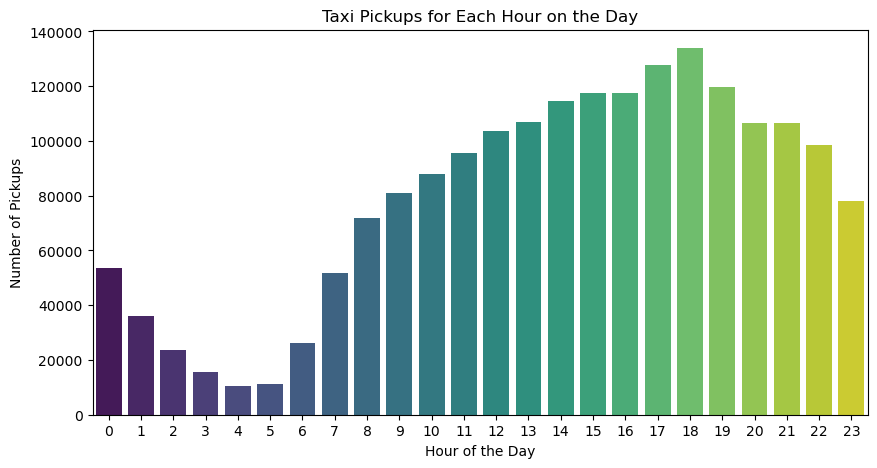

In [288]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(10, 5))
sns.countplot(x="Hour", data=df, palette="viridis")
plt.title("Taxi Pickups for Each Hour on the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.show()


In [298]:
# Find and show the daily trends in taxi pickups (days of the week)

#3.1.2 continued
#Before plotting the graph , extracting the day of week and month from the pick_up datetime column
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

#Plotting continued in next cell

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1896231         2  2023-09-30 23:46:34   2023-09-30 23:53:20                1   
1896232         1  2023-09-30 23:44:51   2023-09-30 23:49:05                3   
1896233         2  2023-09-30 23:11:05   2023-09-30 23:18:42                1   
1896234         1  2023-09-30 23:26:31   2023-10-01 00:04:05                2   
1896235         2  2023-09-30 23:19:47   2023-09-30 23:33:36                1   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1896231           0.79           1           231           231             1   
1896232           0.50           1           158            68             1   
1896233           1.09           1           161           162             1   
1896234          13.20           1           164            14             2   
1896235           2.97           1           231            68             1   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
1896231          8.6  ...        2.00           0.0                    1.0   
1896232          5.8  ...        2.15           0.0                    1.0   
1896233          9.3  ...        2.86           0.0                    1.0   
1896234         54.8  ...        0.00           0.0                    1.0   
1896235         17.0  ...        4.40           0.0                    1.0   

         total_amount  congestion_surcharge  airport_fee        Date  Hour  \
1896231         15.60                   2.5          0.0  2023-09-30    23   
1896232         12.95                   2.5          0.0  2023-09-30    23   
1896233         17.16                   2.5          0.0  2023-09-30    23   
1896234         59.80                   2.5          0.0  2023-09-30    23   
1896235         26.40                   2.5          0.0  2023-09-30    23   

        day_of_week      month  
1896231    Saturday  September  
1896232    Saturday  September  
1896233    Saturday  September  
1896234    Saturday  September  
1896235    Saturday  September  

[5 rows x 22 columns]

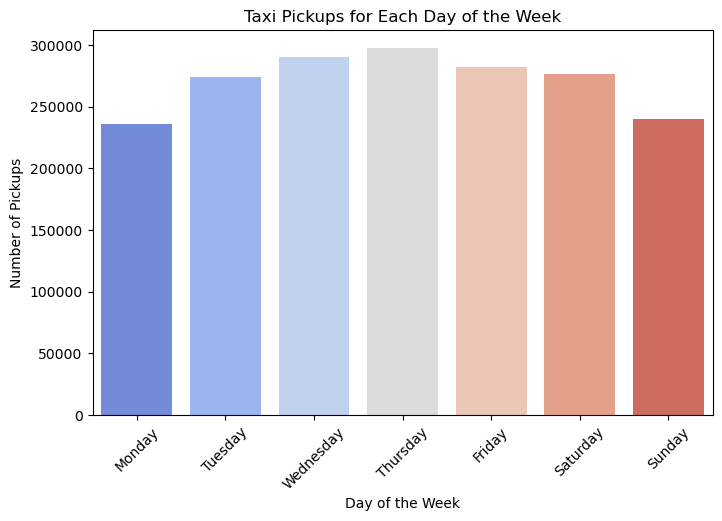

In [299]:
# Find and show the daily trends in taxi pickups (days of the week)
#3.1.2 continued
plt.figure(figsize=(8, 5))
sns.countplot(x="day_of_week", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],palette="coolwarm")
plt.title("Taxi Pickups for Each Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

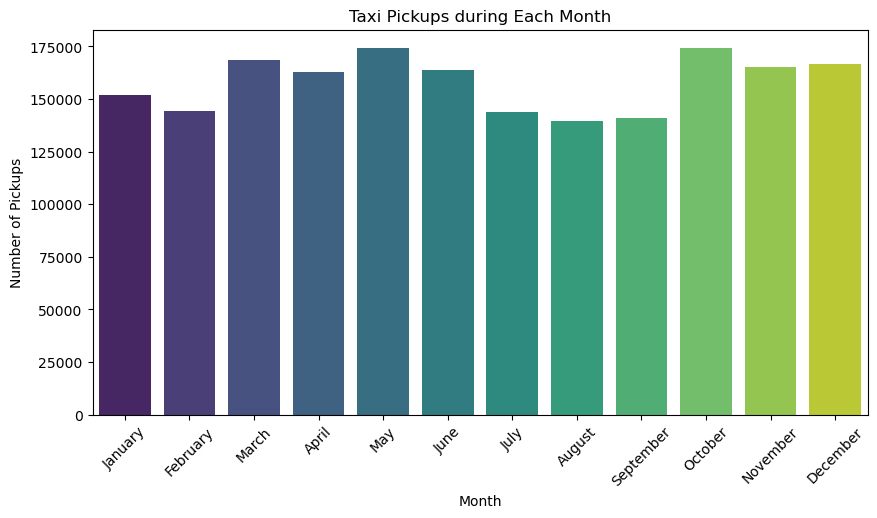

In [300]:
# Show the monthly trends in pickups
#3.1.2 continued
plt.figure(figsize=(10, 5))
sns.countplot(x="month", data=df, order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], palette="viridis")
plt.title("Taxi Pickups during Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [303]:
# Analyse the above parameters
amounts=["fare_amount","tip_amount","total_amount","trip_distance"]
check_amts_negative=(df[amounts] <= 0).sum()
check_amts_negative


fare_amount         588
tip_amount       435848
total_amount        338
trip_distance     37625
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [325]:
# Create a df with non zero entries for the selected parameters.

#Retrieving which columns to filter for zeros
amount_cols_tofilter = ["fare_amount", "tip_amount", "total_amount"]

#creating a new DataFrame without zero values for the above columns
df_NoZero = df[~(df[amount_cols_tofilter] == 0).any(axis=1)]

#Also filtering out rows where trip_distance =0 and pickup and drop zones are different.
df_NoZero = df_NoZero[~((df_NoZero['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

#Cross check the shape for the new df, for understanding of data.
df_NoZero.shape

(1456687, 22)

In [326]:
#Also check if zero values have been removed for the intended columns 
check_amts1=(df_NoZero[amounts] <= 0).sum()
check_amts1

fare_amount         0
tip_amount          0
total_amount        0
trip_distance    5460
dtype: int64

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

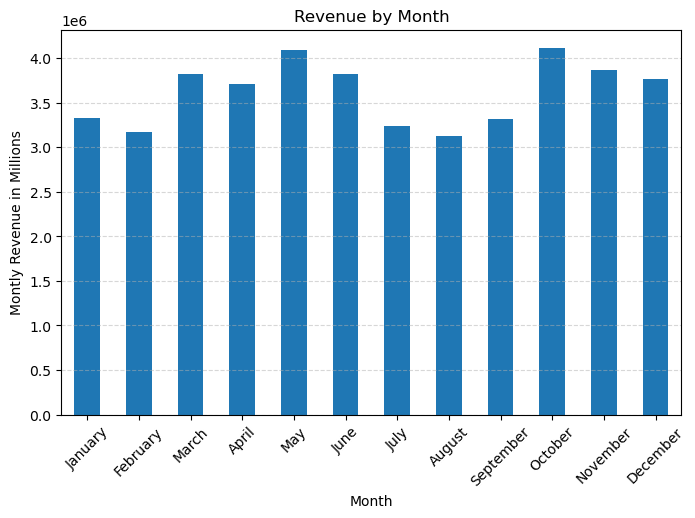

In [331]:
# Group data by month and analyse monthly revenue

#Ordering the months before plotting the data 
monthly_revenue = df_NoZero.groupby("month")["total_amount"].sum()
months_in_order = ["January", "February", "March", "April", "May", "June", 
                 "July", "August", "September", "October", "November", "December"]
monthly_revenue = monthly_revenue.reindex(months_in_order)

#Bar Graph for the above 
plt.figure(figsize=(8, 5))
monthly_revenue.plot(kind="bar")
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Montly Revenue in Millions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [336]:
#Fixing Index before moving forward 
df_NoZero.reset_index(drop=True, inplace=True)
df_NoZero.info()

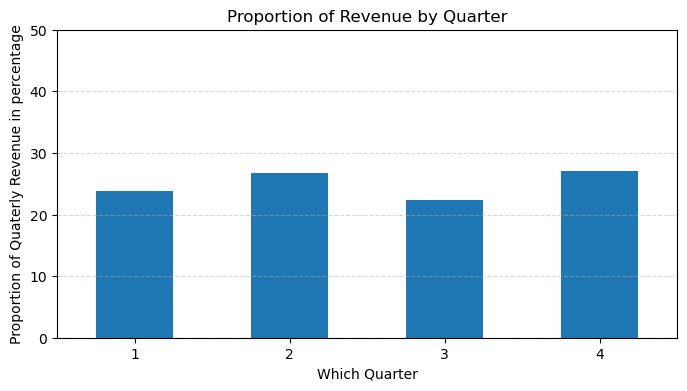

In [338]:
# Calculate proportion of each quarter
revenue_per_qtr = df_NoZero.groupby(df_NoZero["tpep_pickup_datetime"].dt.quarter)["total_amount"].sum()

total_revenue = revenue_per_qtr.sum()
proportion_from_quater = (revenue_per_qtr / total_revenue) * 100

#Bar Plot
plt.figure(figsize=(8, 4))
proportion_from_quater.plot(kind="bar")
plt.title("Proportion of Revenue by Quarter")
plt.xlabel("Which Quarter")
plt.ylabel("Proportion of Quaterly Revenue in percentage")
plt.ylim(0, 50)  # Set y-axis limit
plt.xticks(rotation=360)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

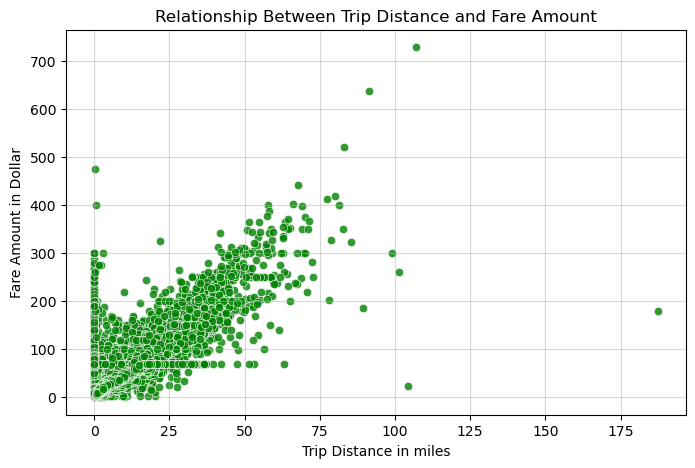

In [339]:
# Show how trip fare is affected by distance

# Visualizing using a scatter plot 
plt.figure(figsize=(8, 5))
sns.scatterplot(x="trip_distance", y="fare_amount", data=df_NoZero, color="green", alpha=0.8)
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance in miles")
plt.ylabel("Fare Amount in Dollar")
plt.grid(alpha=0.5)
plt.show()

#Correlation calculated in the next cell 

In [342]:
# Calculate the correlation value
#3.1.6 continued 
correlation = df_NoZero["trip_distance"].corr(df_NoZero["fare_amount"])
print(f"trip_distance and fare_amount, The correlation is : {correlation:.2f}")

trip_distance and fare_amount, The correlation is : 0.93


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

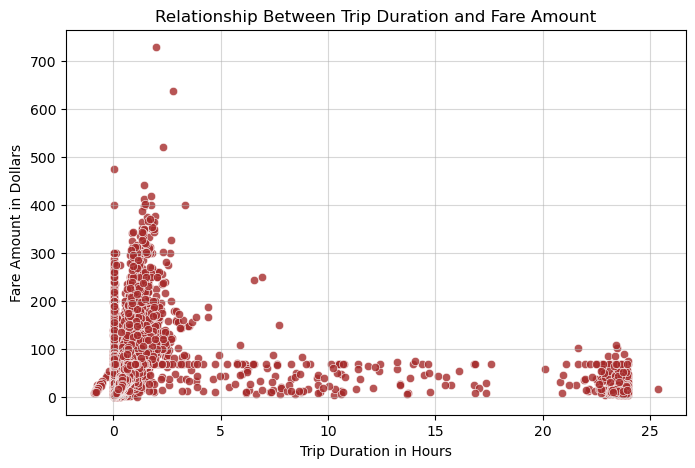

In [343]:
# Show relationship between fare and trip duration
# Calculating the trip duration dynamically and plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=(df_NoZero["tpep_dropoff_datetime"] - df_NoZero["tpep_pickup_datetime"]).dt.total_seconds() /3600,
    y=df_NoZero["fare_amount"],
    color="brown",
    alpha=0.8
)
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.xlabel("Trip Duration in Hours")
plt.ylabel("Fare Amount in Dollars")
plt.grid(alpha=0.5)
plt.show()


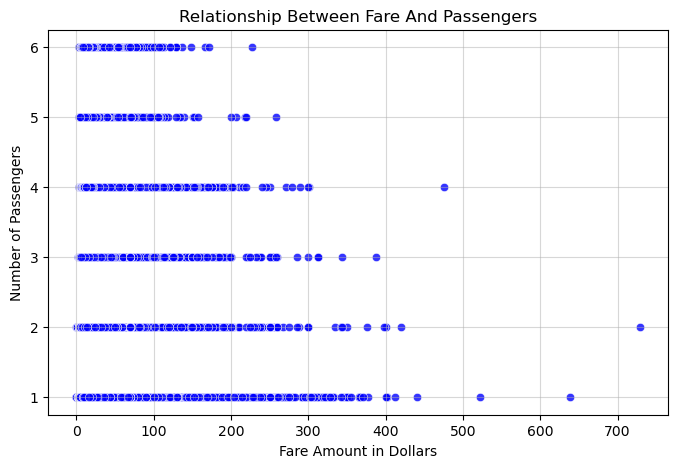

In [344]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_NoZero["fare_amount"],y=df_NoZero["passenger_count"], color="blue",alpha=0.8)
plt.title("Relationship Between Fare And Passengers")
plt.xlabel("Fare Amount in Dollars")
plt.ylabel("Number of Passengers")
plt.grid(alpha=0.5)
plt.show()

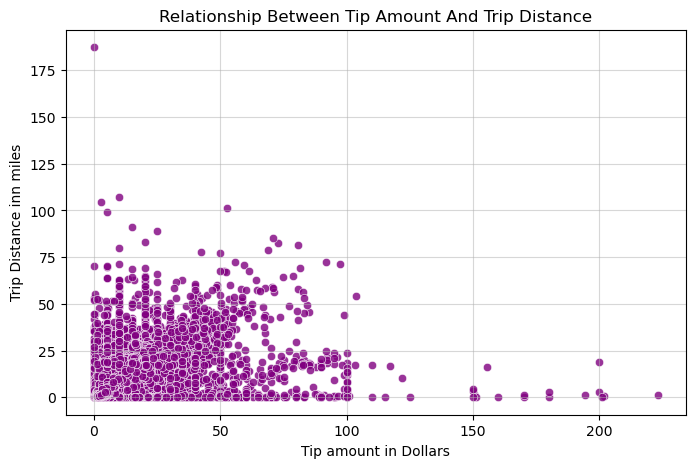

In [346]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_NoZero["tip_amount"],y=df_NoZero["trip_distance"], color="purple", alpha=0.8)
plt.title("Relationship Between Tip Amount And Trip Distance")
plt.xlabel("Tip amount in Dollars")
plt.ylabel("Trip Distance inn miles")
plt.grid(alpha=0.5)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

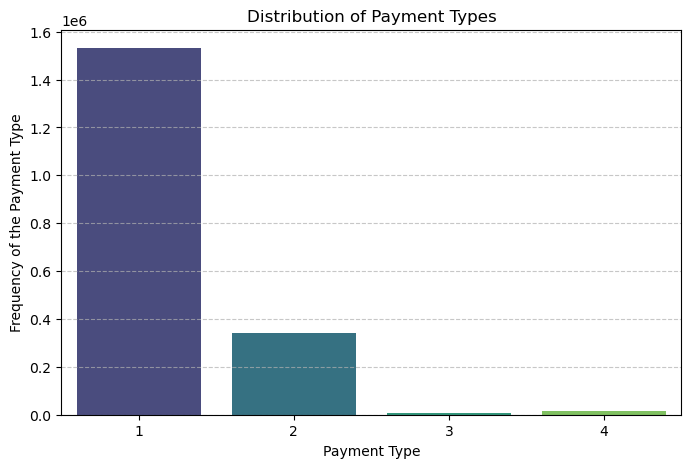

In [353]:
# Analyse the distribution of different payment types (payment_type).

# Count the occurrences of each payment type
#For a better visualisation , I have used the dataframe , where rows with amount=0 are also present for payment_type.
payment_counts = df["payment_type"].value_counts()
payment_counts

# Visualizing using a bar plot 
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Frequency of the Payment Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [358]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r"D:\taxi_zones\taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Figure size 1200x600 with 0 Axes>

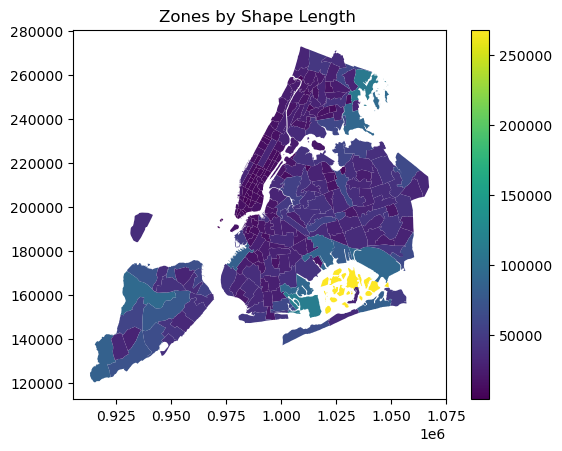

In [359]:
# print(zones.info())
# zones.plot()

## Creating shape area and shape length
zones["Shape_Area"] = zones.geometry.area
zones["Shape_Leng"] = zones.geometry.length

# Plotting geometric parameters from zones on the map
plt.figure(figsize=(12, 6))
zones.plot(column="Shape_Leng", cmap="viridis", legend=True)
plt.title("Zones by Shape Length ")
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [364]:
# Merge zones and trip records using locationID and PULocationID
df_NoZero=df_NoZero.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

(1456719, 29)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [377]:
# Group data by location and calculate the number of trips
trip_per_loc = df_NoZero.groupby("PULocationID").size().reset_index(name="Number_of_Trips")
trip_per_loc.sort_values(by="Number_of_Trips", ascending=False)

PULocationID  Number_of_Trips
214           237            71187
145           161            68837
213           236            65367
117           132            64241
146           162            53520
..            ...              ...
52             58                1
51             57                1
165           183                1
27             32                1
166           184                1

[242 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [381]:
# Merge trip counts back to the zones GeoDataFrame
zones= zones.merge(trip_per_loc, left_on="LocationID", right_on="PULocationID", how="left")
zones.head()


OBJECTID     Shape_Leng    Shape_Area                     zone  LocationID  \
0         1   37646.071866  7.903953e+07           Newark Airport           1   
1         2  267822.231322  1.439095e+08              Jamaica Bay           2   
2         3   25463.107490  3.168508e+07  Allerton/Pelham Gardens           3   
3         4   11304.102523  8.023733e+06            Alphabet City           4   
4         5   29692.078975  5.041488e+07            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  Number_of_Trips  
0           1.0            123.0  
1           2.0              2.0  
2           NaN              NaN  
3           4.0           1708.0  
4           NaN              NaN

In [384]:
#zones has NaN in trip counts, filling that with 0 .
(zones["Number_of_Trips"]).isnull().sum()
zones["Number_of_Trips"] = zones["Number_of_Trips"].fillna(0)

0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

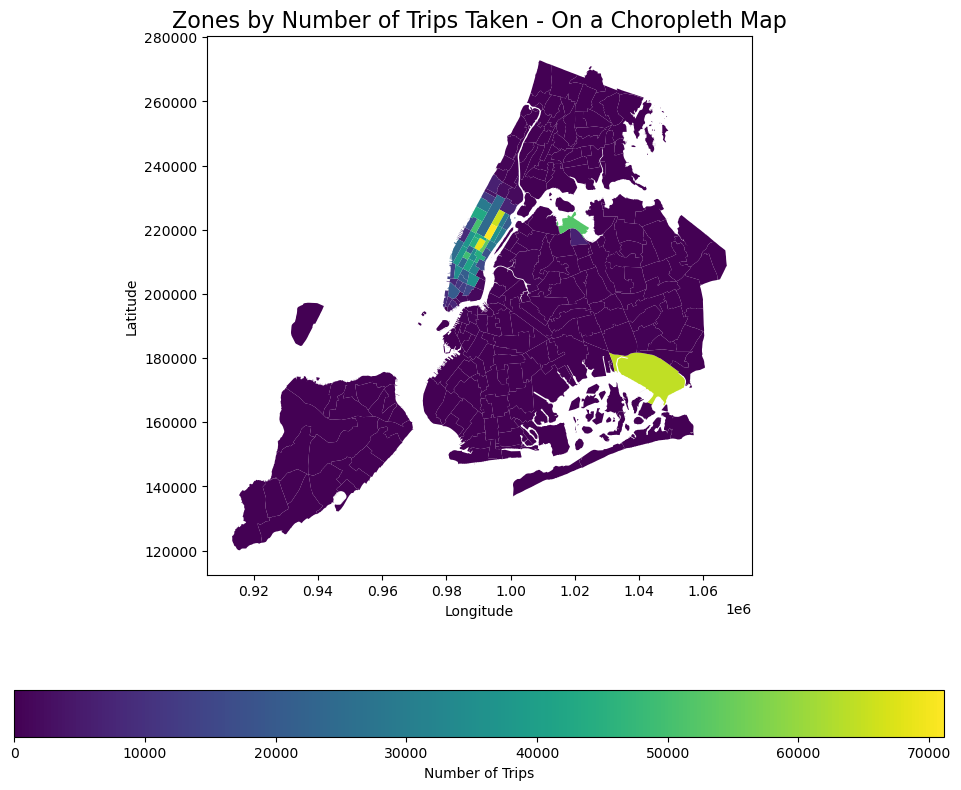

In [387]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot( column="Number_of_Trips",ax=ax, legend=True,  
                       legend_kwds={'label': "Number of Trips",'orientation': "horizontal" } )
ax.set_title("Zones by Number of Trips Taken - On a Choropleth Map", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [388]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by="Number_of_Trips", ascending=False)
print(zones_sorted)

     OBJECTID    Shape_Leng    Shape_Area                    zone  LocationID  \
236       237  13583.330662  9.686910e+06   Upper East Side South         237   
160       161  11425.333378  7.258512e+06          Midtown Center         161   
235       236  14269.183341  1.037911e+07   Upper East Side North         236   
131       132  92037.401155  1.960763e+08             JFK Airport         132   
161       162  11489.626943  4.834224e+06            Midtown East         162   
..        ...           ...           ...                     ...         ...   
171       172  34230.998387  5.540603e+07  New Dorp/Midland Beach         172   
114       115  37119.517359  3.774418e+07     Grymes Hill/Clifton         115   
175       176  44278.825778  5.595230e+07                 Oakwood         176   
4           5  29692.078975  5.041488e+07           Arden Heights           5   
146       147  18964.889729  1.073143e+07                Longwood         147   

           borough         

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [405]:
# Find routes which have the slowest speeds at different times of the day

#checking the info and shape before proceeding 
#df_NoZero.info()
#df_NoZero.head()

# Calculating trip duration in hours
df_NoZero["trip_duration"] = (df_NoZero["tpep_dropoff_datetime"] - df_NoZero["tpep_pickup_datetime"]).dt.total_seconds() / 3600

#Removing any negative values from the trip duration
df_NoZero = df_NoZero[df_NoZero["trip_duration"] >= 0]

#Resetting the index after the above manipulations 
df_NoZero.reset_index(drop=True, inplace=True)

# Calculating and adding a Route column
df_NoZero["Route"] = df_NoZero["PULocationID"].astype(str) + "  to  " + df_NoZero["DOLocationID"].astype(str)

# Calculating the average trip duration by Grouping on Route and Hour. 
group_rut_hr = df_NoZero.groupby(["Route", "Hour"]).agg( avg_trip_duration=("trip_duration", "mean"),total_distance=("trip_distance", "sum") ).reset_index()

#Taking values for avg trip duration greater than 0 and Resetting Index 
group_rut_hr = group_rut_hr[group_rut_hr["avg_trip_duration"] > 0]
group_rut_hr.reset_index(drop=True, inplace=True)

# find out speed for each group of Route and Hour
group_rut_hr["Speed"] = group_rut_hr["total_distance"] / group_rut_hr["avg_trip_duration"]

group_rut_hr["Speed"].value_counts()

#  Identify the slowest routes by sorting on speed
slow_routes = group_rut_hr.sort_values(by="Speed", ascending=True)

print(slow_routes)

               Route  Hour  avg_trip_duration  total_distance    Speed
108303    98  to  98    21           0.003056            0.00     0.00
78502   258  to  258     0           0.004722            0.00     0.00
78497   257  to  257    23           0.001667            0.00     0.00
61391   232  to  232     5           0.002500            0.00     0.00
78495   257  to  257     0           0.008889            0.00     0.00
...              ...   ...                ...             ...      ...
84061   264  to  264    17           0.293720         2321.11  7902.45
84064   264  to  264    20           0.246876         2014.54  8160.13
84066   264  to  264    22           0.257190         2193.72  8529.56
84065   264  to  264    21           0.234019         2181.80  9323.18
84062   264  to  264    18           0.271613         2537.64  9342.84

[108304 rows x 5 columns]


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

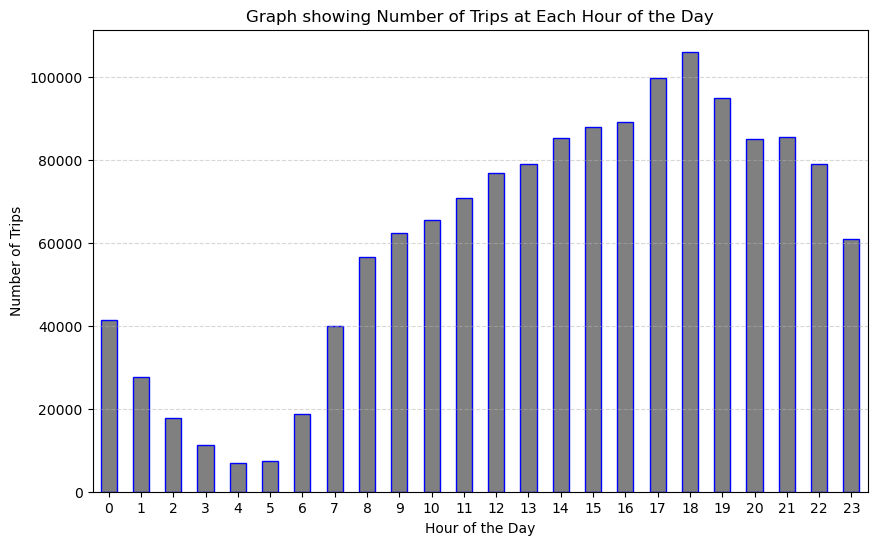


The busiest hour is : 18:00 hrs


In [410]:
# Visualise the number of trips per hour and find the busiest hour

# Create Trips_per_Hour having the number of trips for each hour
Trips_per_Hour = df_NoZero["Hour"].value_counts().sort_index()

# Visualize the number of trips for each hour
plt.figure(figsize=(10, 6))
Trips_per_Hour.plot(kind="bar", color="grey",edgecolor='blue')
plt.title("Graph showing Number of Trips at Each Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0)
plt.show()

# Identifying the busiest hour
busiest_hour = Trips_per_Hour.idxmax()
print("\nThe busiest hour is :", str(busiest_hour)+":00 hrs")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [419]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.77
# Scale up the numbers

# include Number_Of_Trips Column based on Route and Hour in to the dataframe
trip_per_rutHr = df_NoZero.groupby(["Route", "Hour"]).size().reset_index(name="Number_Of_Trips")
df_NoZero = df_NoZero.merge(trip_per_rutHr, on=["Route", "Hour"], how="left")

#Adding and rounding trips scaled up column 
df_NoZero["Trips_Scaled_Up"] = df_NoZero["Number_Of_Trips"] / sample_fraction
df_NoZero["Trips_Scaled_Up"] = df_NoZero["Trips_Scaled_Up"].round().astype(int)

df_NoZero.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
1         2  2023-01-01 00:43:00   2023-01-01 01:01:00                1   
2         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   
3         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
4         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24           1           161           237             1   
1          19.24           1            66           107             1   
2           7.10           1           246            37             1   
3           1.59           1            79           164             1   
4           3.16           1            79           256             1   

   fare_amount  ...    Shape_Leng    Shape_Area                       zone  \
0         7.90  ...  11425.333378  7.258512e+06             Midtown Center   
1        25.64  ...  15299.003107  7.669160e+06         DUMBO/Vinegar Hill   
2        34.50  ...  32943.153383  1.285077e+07  West Chelsea/Hudson Yards   
3        11.40  ...  13539.086402  1.089506e+07               East Village   
4        19.10  ...  13539.086402  1.089506e+07               East Village   

   LocationID    borough                                           geometry  \
0       161.0  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
1        66.0   Brooklyn  POLYGON ((990055.507 196472.349, 990004.46 196...   
2       246.0  Manhattan  POLYGON ((983031.177 217138.506, 983640.32 216...   
3        79.0  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
4        79.0  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   

   trip_duration         Route Number_Of_Trips  Trips_Scaled_Up  
0       0.084722  161  to  237              40               52  
1       0.300000   66  to  107               1                1  
2       0.560278   246  to  37               3                4  
3       0.175278   79  to  164              68               88  
4       0.264722   79  to  256              19               25  

[5 rows x 33 columns]

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

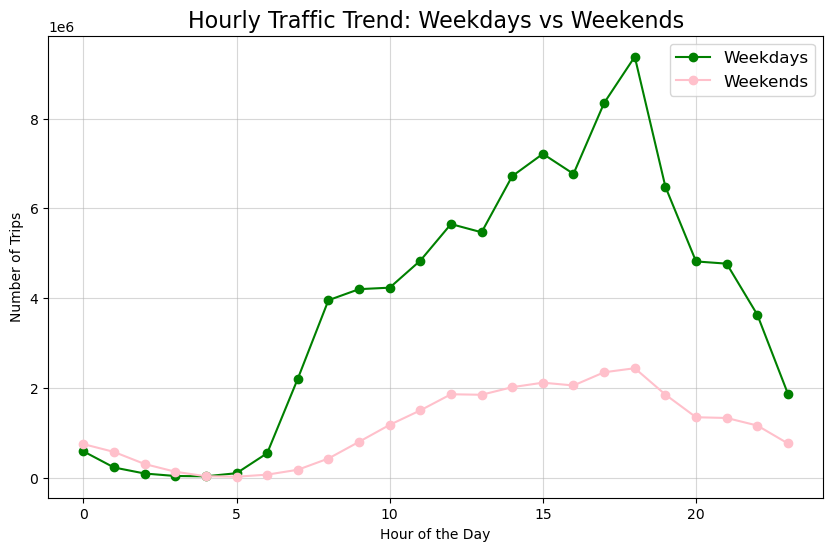

In [425]:
# Compare traffic trends for the week days and weekends

# Define lists for weekdays and weekends
list_of_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
list_of_weekends = ["Saturday", "Sunday"]

# Retrieve weekdays and weekends separately
weekdays = df_NoZero[df_NoZero["day_of_week"].isin(list_of_weekdays)]
weekends = df_NoZero[df_NoZero["day_of_week"].isin(list_of_weekends)]

# Group by hour and sum Number_of_Trips
Trips_On_weekday = weekdays.groupby("Hour")["Number_Of_Trips"].sum()
Trips_On_weekend = weekends.groupby("Hour")["Number_Of_Trips"].sum()

# Visualizing the trends for hourly traffic 
plt.figure(figsize=(10, 6))
plt.plot(Trips_On_weekday, label="Weekdays", color="green" ,marker="o" )
plt.plot(Trips_On_weekend, label="Weekends", color="pink",marker="o" )
plt.title("Hourly Traffic Trend: Weekdays vs Weekends", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

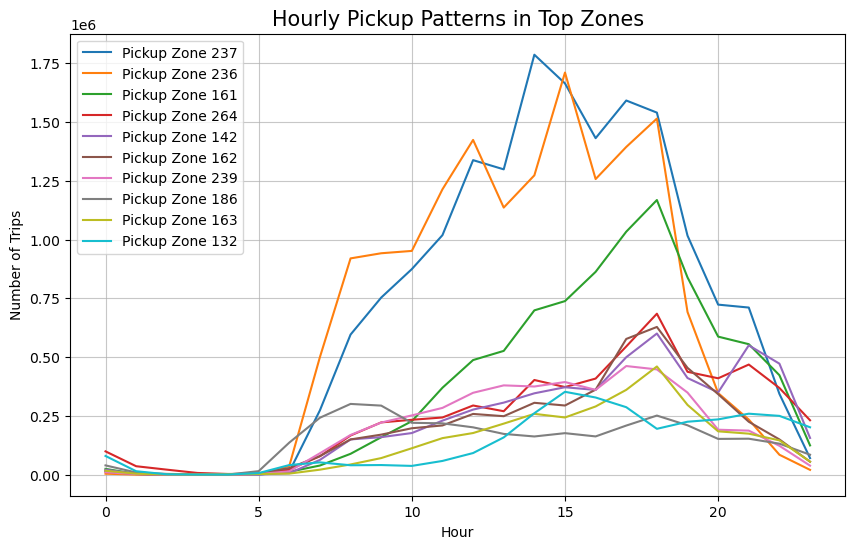

In [426]:
# Find top 10 pickup and dropoff zones

# Summing up hourly data for pickups
pickups = df_NoZero.groupby(["PULocationID", "Hour"])["Number_Of_Trips"].sum().reset_index()

# Finding the top 10 pickup zones
top_pickup_zones = pickups.groupby("PULocationID")["Number_Of_Trips"].sum().nlargest(10).index
top_pickups = pickups[pickups["PULocationID"].isin(top_pickup_zones)]

# Visualizing the trends for pickups in top zones
plt.figure(figsize=(10, 6))
for zone in top_pickup_zones:
    zone_data = top_pickups[top_pickups["PULocationID"] == zone]
    plt.plot(zone_data["Hour"], zone_data["Number_Of_Trips"], label=f"Pickup Zone {zone}")

plt.title("Hourly Pickup Patterns in Top Zones", fontsize=15)
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(alpha=0.7)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [429]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculating total pickups and dropofss
pickups1 = df_NoZero.groupby("PULocationID")["Number_Of_Trips"].sum().reset_index(name="Total_Pickups")
dropoffs1 = df_NoZero.groupby("DOLocationID")["Number_Of_Trips"].sum().reset_index(name="Total_Dropoffs")


# Merge pickups and dropoffs into a single DataFrame
zones = pd.merge(pickups1, dropoffs1, left_on="PULocationID", right_on="DOLocationID", how="outer")
zones = zones.rename(columns={"PULocationID": "Zone"}).fillna(0)

# Compute the ratio of pickups to dropoffs
zones["Pickup/Dropoff_Ratio"] = zones["Total_Pickups"] / zones["Total_Dropoffs"]

# Handle division by zero cases
zones["Pickup/Dropoff_Ratio"] = zones["Pickup/Dropoff_Ratio"].replace([float("inf"), -float("inf")], 0)

# Sort for 10 highest ratios
top_10_highest = zones.sort_values(by="Pickup/Dropoff_Ratio", ascending=False).head(10)

# Sort for 10 lowest ratios
top_10_lowest = zones.sort_values(by="Pickup/Dropoff_Ratio", ascending=True).head(10)

print("Top 10 Highest are below","\n",top_10_highest,"\n\n", "Top 10 Lowest are below", "\n",top_10_lowest)


Top 10 Highest are below 
       Zone  Total_Pickups  DOLocationID  Total_Dropoffs  Pickup/Dropoff_Ratio
69    70.0        53721.0          70.0          3058.0             17.567364
126  132.0      3225051.0         132.0        523359.0              6.162216
132  138.0      3058790.0         138.0       1135784.0              2.693109
180  186.0      3555005.0         186.0       1797808.0              1.977411
42    43.0      1537381.0          43.0        846921.0              1.815259
201  207.0           12.0         207.0             7.0              1.714286
108  114.0       667862.0         114.0        453949.0              1.471227
243  249.0      1822265.0         249.0       1416169.0              1.286757
157  163.0      3304433.0         163.0       2573522.0              1.284012
156  162.0      4762453.0         162.0       3902493.0              1.220362 

 Top 10 Lowest are below 
       Zone  Total_Pickups  DOLocationID  Total_Dropoffs  Pickup/Dropoff_Ratio
193  199

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [430]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_hrs = df_NoZero[(df_NoZero["Hour"] >= 23) | (df_NoZero["Hour"] <= 5)]

# Aggregate data for pickups
night_pickups = night_hrs.groupby("PULocationID")["Number_Of_Trips"].sum().reset_index(name="Total_Pickups")
top_10_pickups = night_pickups.sort_values(by="Total_Pickups", ascending=False).head(10)

# Aggregate data for dropoffs
night_dropoffs = night_hrs.groupby("DOLocationID")["Number_Of_Trips"].sum().reset_index(name="Total_Dropoffs")
top_10_dropoffs = night_dropoffs.sort_values(by="Total_Dropoffs", ascending=False).head(10)


# Display results
print("Top 10 Pickup Zones During Night Hours:")
print(top_10_pickups)

print("\nTop 10 Dropoff Zones During Night Hours:")
print(top_10_dropoffs)


Top 10 Pickup Zones During Night Hours:
     PULocationID  Total_Pickups
58             79         788742
193           249         576195
204           264         403591
32             48         339988
94            132         306964
108           148         294453
81            114         282114
177           230         191680
103           142         184145
120           161         162234

Top 10 Dropoff Zones During Night Hours:
     DOLocationID  Total_Dropoffs
77             79          481605
255           264          404147
101           107          270475
163           170          263236
46             48          225179
66             68          211557
240           249          191913
134           141          187850
230           239          164221
254           263          161579


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [431]:
# Filter for night hours (11 PM to 5 AM)

# Define nighttime and daytime filters
nighttime = df_NoZero[(df_NoZero["Hour"] >= 23) | (df_NoZero["Hour"] <= 5)]
daytime = df_NoZero[(df_NoZero["Hour"] > 5) & (df_NoZero["Hour"] < 23)]

# Calculate total revenue for nighttime and daytime
nighttime_revenue = nighttime["total_amount"].sum()
daytime_revenue = daytime["total_amount"].sum()

# Calculate total revenue
total_revenue = df_NoZero["total_amount"].sum()

# Calculate revenue shares
nighttime_share = (nighttime_revenue / total_revenue) * 100
daytime_share = (daytime_revenue / total_revenue) * 100

# Display results
print(f"Revenue Share at Nighttime : {nighttime_share:.2f}%")
print(f"Revenue Share at Daytime : {daytime_share:.2f}%")


Revenue Share at Nighttime : 12.13%
Revenue Share at Daytime : 87.87%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [433]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid rows (trip_distance <= 0 or passenger_count <= 0)
df_NoZero = df_NoZero[(df_NoZero["trip_distance"] > 0) & (df_NoZero["passenger_count"] > 0)]

# Calculate fare per mile per passenger
df_NoZero["fare_per_mile_per_passenger"] = df_NoZero["total_amount"] / (df_NoZero["trip_distance"] * df_NoZero["passenger_count"])

# Group by passenger count and calculate the average
average_fare = df_NoZero.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

# Rename columns for clarity
average_fare = average_fare.rename(columns={"fare_per_mile_per_passenger": "average_fare_per_mile_per_passenger"})

print("Average Fare Per Mile Per Passenger for Different Passenger Counts:")
print(average_fare)

#Plot continued in next cell 

Average Fare Per Mile Per Passenger for Different Passenger Counts:
   passenger_count  average_fare_per_mile_per_passenger
0                1                            15.145422
1                2                             7.926678
2                3                             5.311818
3                4                             5.700343
4                5                             2.662851
5                6                             2.171896


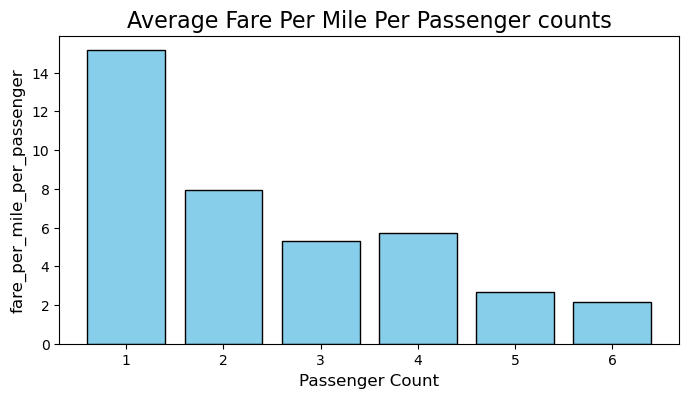

In [439]:
# 3.2.9 continued , visualizing the data 
plt.figure(figsize=(8, 4))
plt.bar(average_fare['passenger_count'], average_fare['average_fare_per_mile_per_passenger'],
    color='skyblue', edgecolor='black')
plt.title('Average Fare Per Mile Per Passenger counts', fontsize=16)
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("fare_per_mile_per_passenger", fontsize=12)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

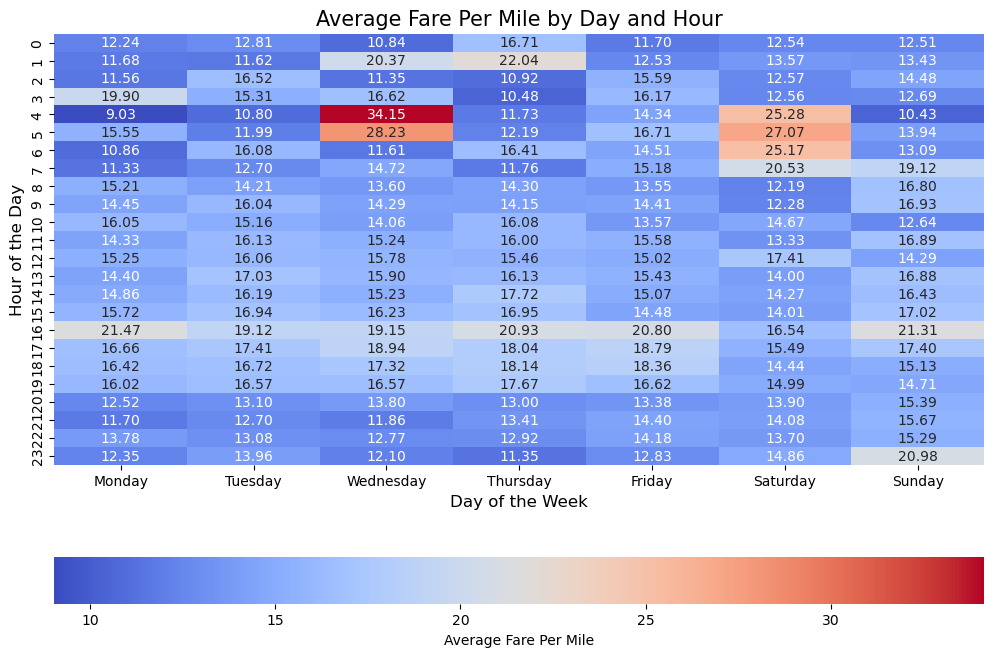

In [440]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate fare per mile
df_NoZero["fare_per_mile"] = df_NoZero["total_amount"] / df_NoZero["trip_distance"]

# Define the desired order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert the day_of_week column to a categorical type with the specified order
df_NoZero["day_of_week"] = pd.Categorical(df_NoZero["day_of_week"], categories=day_order, ordered=True)

# Group by day_of_week and Hour to calculate average fare per mile
average_fare_by_day_hour = df_NoZero.groupby(["day_of_week", "Hour"])["fare_per_mile"].mean().reset_index()

# create a pivot table need for the heatmap
pivot_table = average_fare_by_day_hour.pivot(index="Hour", columns="day_of_week", values="fare_per_mile")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Average Fare Per Mile','orientation': "horizontal"})
plt.title("Average Fare Per Mile by Day and Hour", fontsize=15)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Hour of the Day", fontsize=12)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

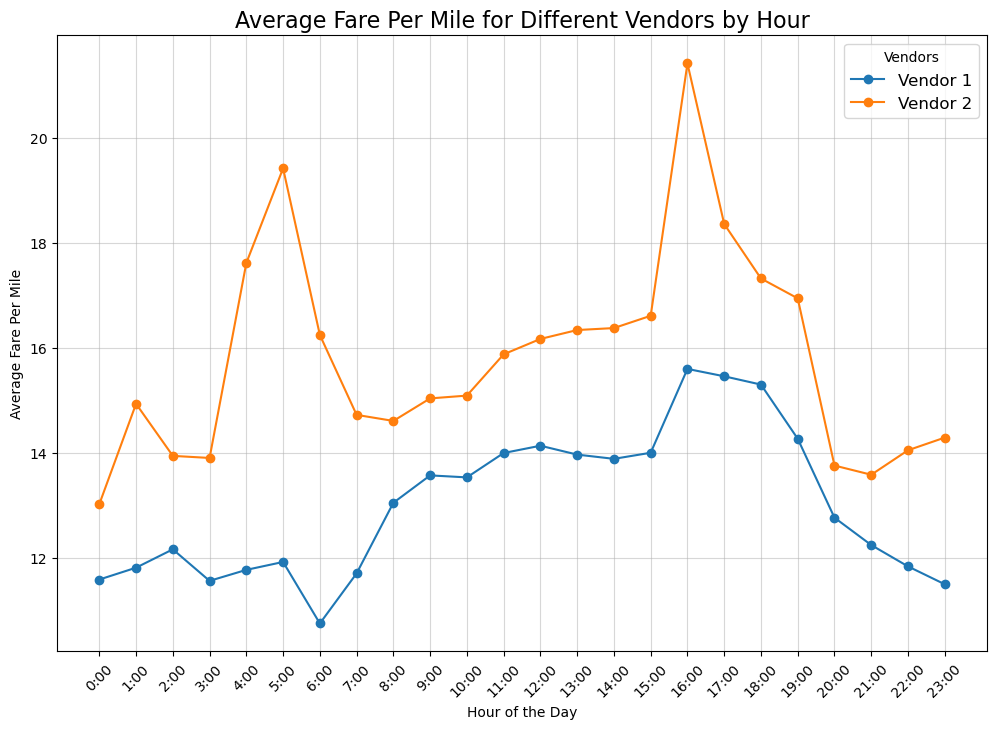

In [441]:
# Compare fare per mile for different vendors

# Group by VendorID and Hour, and calculate the average fare per mile
average_fare = df_NoZero.groupby(["VendorID", "Hour"])["fare_per_mile"].mean().reset_index()

# Plot the data
hours = list(range(24)) 

plt.figure(figsize=(12, 8))
for vendor_id in average_fare["VendorID"].unique():
    vendor_wise_fare = average_fare[average_fare["VendorID"] == vendor_id]
    plt.plot(vendor_wise_fare["Hour"], vendor_wise_fare["fare_per_mile"], label=f"Vendor {vendor_id}", marker="o")


plt.title("Average Fare Per Mile for Different Vendors by Hour", fontsize=16)
plt.xlabel("Hour of the Day")
plt.xticks(hours, labels=[f"{h}:00" for h in hours], rotation=45)  
plt.ylabel("Average Fare Per Mile")
plt.legend(title="Vendors", fontsize=12)
plt.grid(alpha=0.5)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [442]:
# Defining distance tiers

def assign_tier(distance):
    if distance <= 2:
        return "Tier 1: ≤ 2 miles"
    elif 2 < distance <= 5:
        return "Tier 2: 2–5 miles"
    else:
        return "Tier 3: > 5 miles"

df_NoZero["Distance_Tier"] = df_NoZero["trip_distance"].apply(assign_tier)

# Group by VendorID and Distance_Tier, and calculate average fare per mile
average_fare_by_tier = df_NoZero.groupby(["VendorID", "Distance_Tier"])["fare_per_mile"].mean().reset_index()

# Pivot for better visualization
pivot_table = average_fare_by_tier.pivot(index="Distance_Tier", columns="VendorID", values="fare_per_mile")

# Display the results
print("Average Fare Per Mile by Vendor and Distance Tier:")
print(pivot_table)


Average Fare Per Mile by Vendor and Distance Tier:
VendorID                   1          2
Distance_Tier                          
Tier 1: ≤ 2 miles  17.299436  22.514442
Tier 2: 2–5 miles   9.509933   9.735076
Tier 3: > 5 miles   6.411560   6.406135


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Average Tip Percentage by Distance Range:
       Distance_Tier  tip_percentage
0  Tier 1: ≤ 2 miles       18.878652
1  Tier 2: 2–5 miles       18.170764
2  Tier 3: > 5 miles       18.076714

Average Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0                1       18.525668
1                2       18.575901
2                3       18.576444
3                4       18.794420
4                5       18.567426
5                6       18.753243

Average Tip Percentage by Pickup Hour:
    Hour  tip_percentage
0      0       18.239755
1      1       18.252102
2      2       18.346369
3      3       18.836801
4      4       18.951433
5      5       18.224554
6      6       18.280157
7      7       18.212953
8      8       18.338555
9      9       18.637243
10    10       18.859835
11    11       18.935869
12    12       18.908277
13    13       18.949025
14    14       18.861183
15    15       18.726276
16    16       18.484984
17    17       18.357325
18    

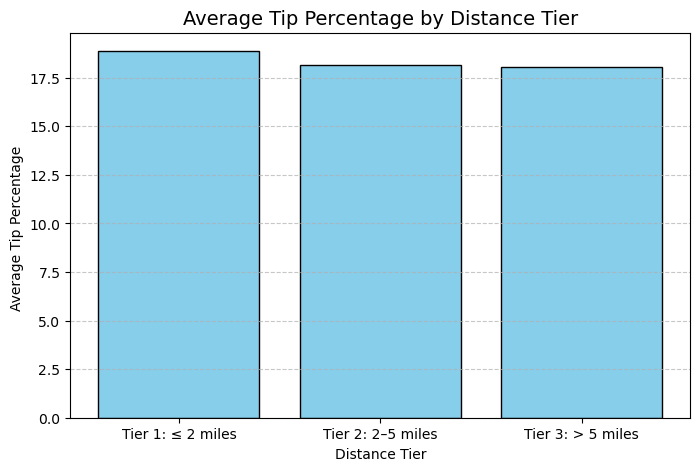

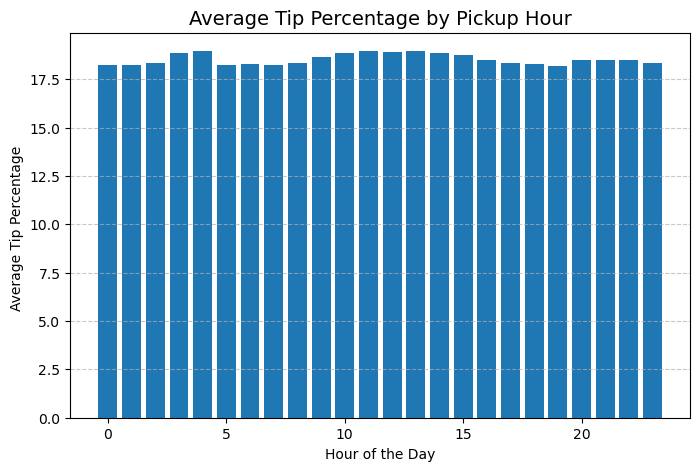

In [443]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
df_NoZero["tip_percentage"] = (df_NoZero["tip_amount"] / (df_NoZero["total_amount"] - df_NoZero["tip_amount"])) * 100

# Group by distance, passenger count, and pickup hour
tip_by_distance = df_NoZero.groupby("Distance_Tier")["tip_percentage"].mean().reset_index()
tip_by_passenger = df_NoZero.groupby("passenger_count")["tip_percentage"].mean().reset_index()
tip_by_hour = df_NoZero.groupby("Hour")["tip_percentage"].mean().reset_index()

# Display results
print("Average Tip Percentage by Distance Range:")
print(tip_by_distance)

print("\nAverage Tip Percentage by Passenger Count:")
print(tip_by_passenger)

print("\nAverage Tip Percentage by Pickup Hour:")
print(tip_by_hour)


# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(tip_by_distance["Distance_Tier"], tip_by_distance["tip_percentage"], color="skyblue", edgecolor="black")
plt.title("Average Tip Percentage by Distance Tier", fontsize=14)
plt.xlabel("Distance Tier")
plt.ylabel("Average Tip Percentage ")
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()

# Plot for Average Tip Percentage by Pickup Hour
plt.figure(figsize=(8, 5))
plt.bar(tip_by_hour["Hour"], tip_by_hour["tip_percentage"])
plt.title("Average Tip Percentage by Pickup Hour", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage ")
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

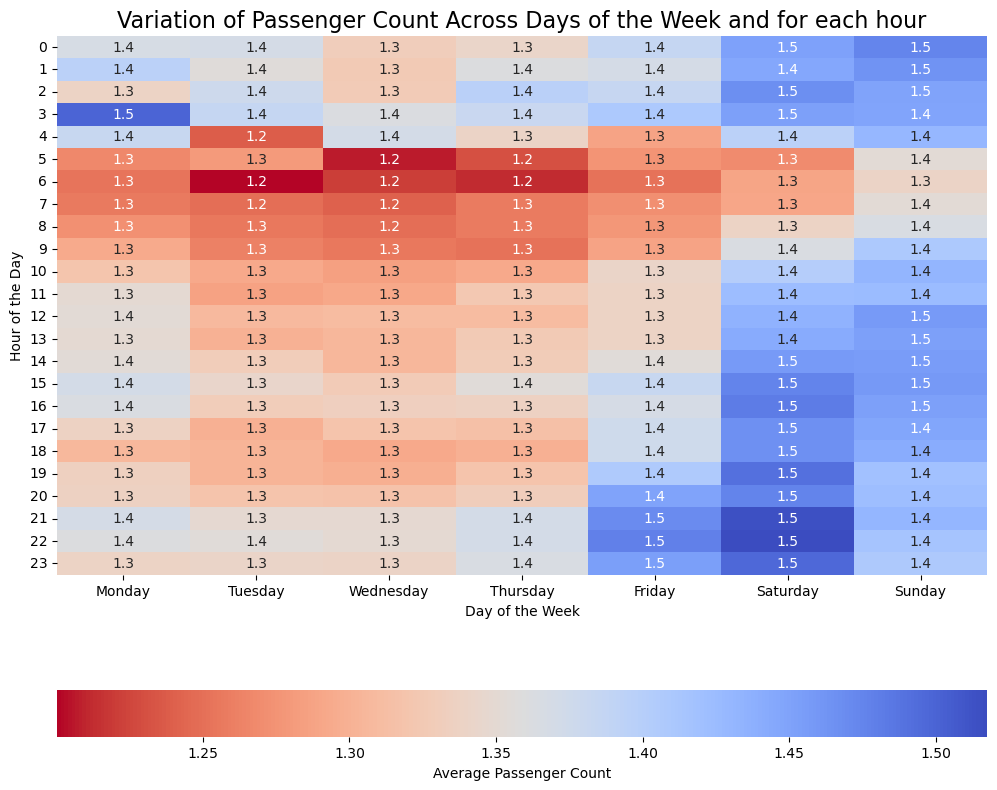

In [444]:
# See how passenger count varies across hours and days

# Group by Hour and Day of the Week
passenger_variation = df_NoZero.groupby(["Hour", "day_of_week"])["passenger_count"].mean().reset_index()

# Pivot the data for a heatmap
pivot_table = passenger_variation.pivot(index="Hour", columns="day_of_week", values="passenger_count")

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm_r", fmt=".1f", 
            cbar_kws={'label': 'Average Passenger Count','orientation':'horizontal'})
plt.title("Variation of Passenger Count Across Days of the Week and for each hour", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.yticks(rotation=0)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

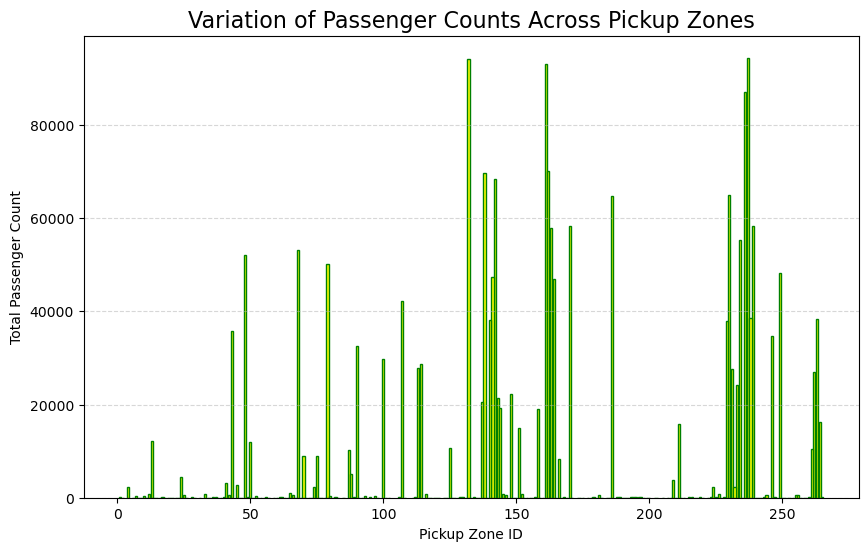

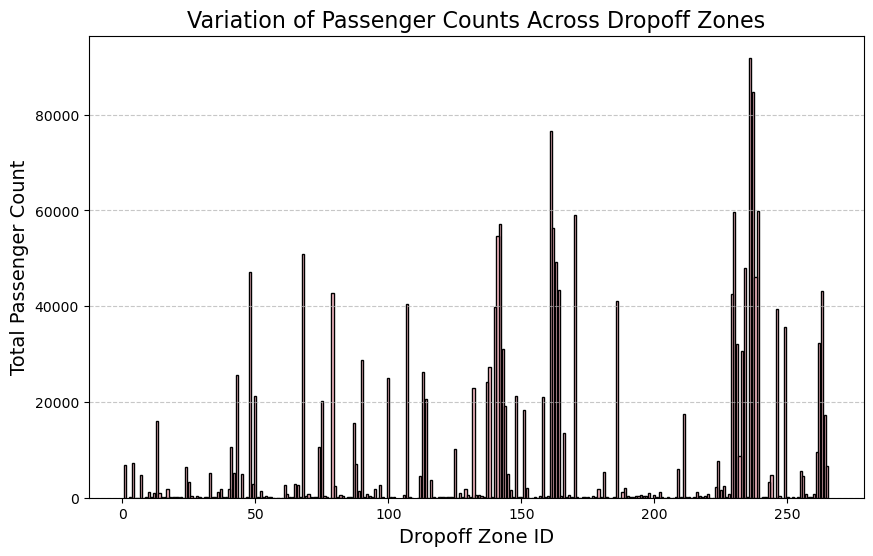

In [445]:
# How does passenger count vary across zones

# First Group by pickup zone which is PULocationID
pickup_zone_var = df_NoZero.groupby("PULocationID")["passenger_count"].sum().reset_index(name="Total_Passenger_Count")
pickup_zone_var = pickup_zone_var.sort_values(by="Total_Passenger_Count", ascending=False)

# Then Group by dropoff zone which is DOLocationID
dropoff_zone_var = df_NoZero.groupby("DOLocationID")["passenger_count"].sum().reset_index(name="Total_Passenger_Count")
dropoff_zone_var = dropoff_zone_var.sort_values(by="Total_Passenger_Count", ascending=False)

# Bar Graph for passenger counts across pickup zones
plt.figure(figsize=(10, 6))
plt.bar(pickup_zone_var["PULocationID"], pickup_zone_var["Total_Passenger_Count"], color="yellow", edgecolor="green")
plt.title("Variation of Passenger Counts Across Pickup Zones", fontsize=16)
plt.xlabel("Pickup Zone ID")
plt.ylabel("Total Passenger Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Bar Graph for passenger counts across dropoff zones
plt.figure(figsize=(10, 6))
plt.bar(dropoff_zone_var["DOLocationID"], dropoff_zone_var["Total_Passenger_Count"], color="pink", edgecolor="black")
plt.title("Variation of Passenger Counts Across Dropoff Zones", fontsize=16)
plt.xlabel("Dropoff Zone ID", fontsize=14)
plt.ylabel("Total Passenger Count", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [475]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Creating the zones_with_trips DataFrame
trip_per_loc1 = df_NoZero.groupby("PULocationID").size().reset_index(name="Number_of_Trips")

# Merging trip counts back to the zones GeoDataFrame
zones_with_trips= zones.merge(trip_per_loc1, left_on="Zone", right_on="PULocationID", how="left")

#Cleaning the dataframe
#Dropping redundant columns
zones_with_trips.drop(columns=["PULocationID_y"], inplace=True)

#Renaming the columns to remove _x
zones_with_trips = zones_with_trips.rename(columns={'PULocationID_x': 'PULocationID'})

#Handling the Null values in the column 
zones_with_trips["Number_of_Trips"] = zones_with_trips["Number_of_Trips"].fillna(0)

#3.2.15 Continued in next cell 

0

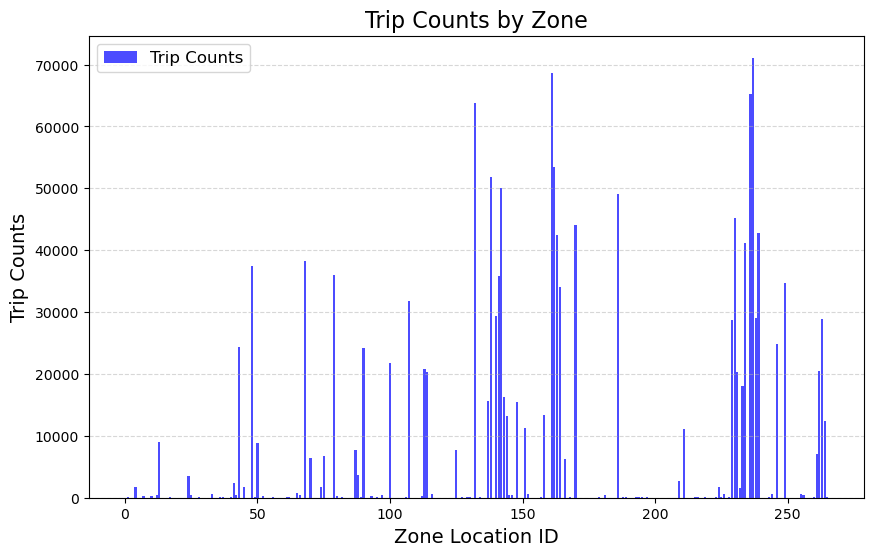

In [493]:
#3.2.15 Continued
# Create a new column for the average passenger count in each zone.
#average_passenger_count = df_NoZero.groupby("PULocationID")["passenger_count"].mean().reset_index(name="average_passenger_count") = df_NoZero.groupby("PULocationID")["passenger_count"].mean().reset_index(name="average_passenger_count")
#average_passenger_count.head()

# Merge the results with the GeoDataFrame
#zones_with_trips = zones_with_trips.merge(average_passenger_count, left_on="Zone", right_on="PULocationID", how="left")

# Plot trip counts as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(zones_with_trips["Zone"], zones_with_trips["Number_of_Trips"], color="blue", alpha=0.7, label="Trip Counts")
plt.title("Trip Counts by Zone", fontsize=16)
plt.xlabel("Zone Location ID", fontsize=14)
plt.ylabel("Trip Counts", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

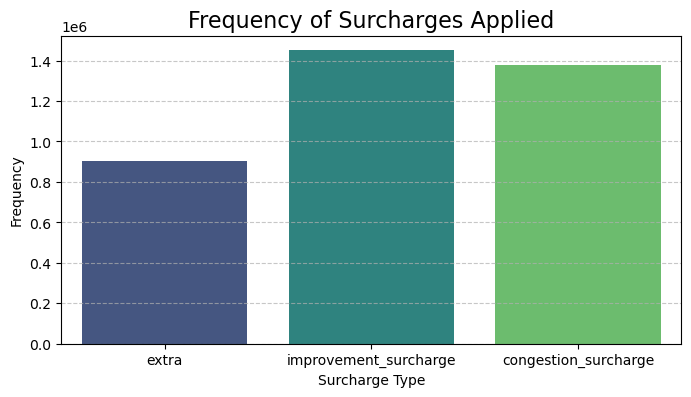

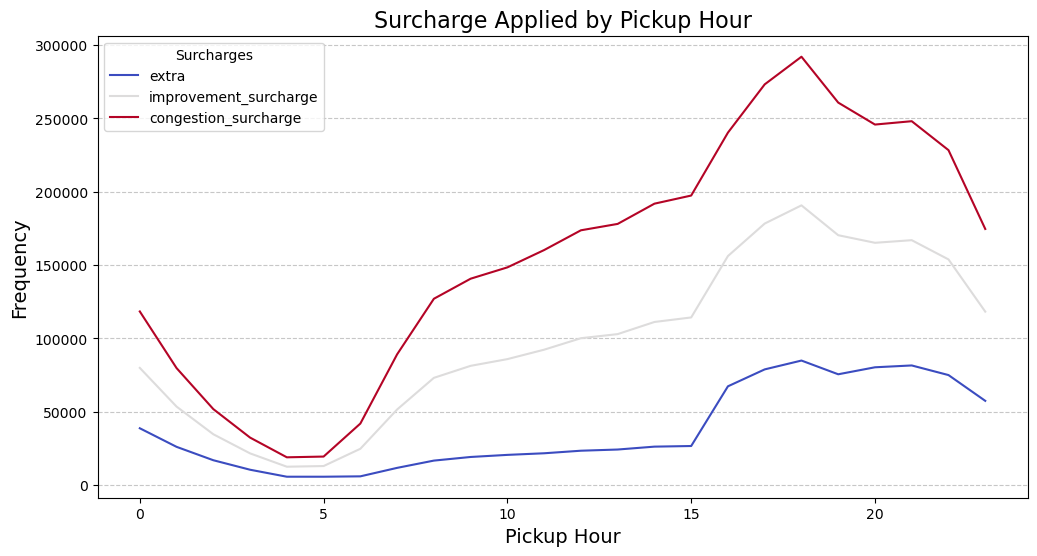

In [452]:
# How often is each surcharge applied?

# Retrieving data on how often each surcharge is applied
all_surcharge_sum = pd.DataFrame({
    "extra": (df_NoZero["extra"] > 0).sum(),
    "improvement_surcharge": (df_NoZero["improvement_surcharge"] > 0).sum(),
    "congestion_surcharge": (df_NoZero["congestion_surcharge"] > 0).sum()
}, index=["Frequency"]).T.reset_index()

# Group by pickup zones for surcharges
pickup_zones2 = df_NoZero.groupby("PULocationID")[["extra", "improvement_surcharge", "congestion_surcharge"]].apply(
    lambda x: (x > 0).sum()).reset_index()

# Group by pickup hour for surcharges
pickup_hours2 = df_NoZero.groupby("Hour")[["extra", "improvement_surcharge", "congestion_surcharge"]].apply(
    lambda x: (x > 0).sum()).reset_index()

# Plotting Frequency of Each Surcharge
plt.figure(figsize=(8, 4))
sns.barplot(x="index", y="Frequency", data=all_surcharge_sum, palette="viridis")
plt.title("Frequency of Surcharges Applied", fontsize=16)
plt.xlabel("Surcharge Type")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plotting by Pickup Hour
pickup_hours2.plot(x="Hour", kind="line", figsize=(12, 6), stacked=True, colormap="coolwarm")
plt.title("Surcharge Applied by Pickup Hour", fontsize=16)
plt.xlabel("Pickup Hour", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Surcharges")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
1.It is good to divert the routes during the busy hours like 18:00 hrs.
2. Most usage has been within distances less than 2 miles. So, arranging more vehicles for accessibility wihtin 2 miles will be
a lot useful.
3. On mid of the weekdays, increasing the numbers of cabs and increasing the price to a small extent can help,as the passengers 
will anyway engage the taxi during those times.
4. The same can be applied during evening hours on a weekend.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1. The Usage of Taxis picks up during the timings of 10 a.m. to 20:00 hrs, so placing more cabs in the zones having high demands ( zones 237, 161 , 236, 132) caters to the demand.
2. This could followed more rigorously from Wednesdays to Fridays of a week and especially during 
the 2nd and 4th quaters of the year, where the Taxi Usage seemingly increases .
3.It seems to be wise, to have more taxis placed in the zones 237, 161 , 236, 132 during the months Apr-June and Oct-Dec , 
to cater to the demand during these months and hence can be a pathway for increased revenues.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. Extra or Surcharges for short distance travels can be reduced , to have optimised prices, as most of the single
passengers seem to be travelling wihtin the shorter distances.
2. Prices can be adjusted dynamically, based on number of passengers travelling together. Since the average fare per passenger 
is still less, an overall higher fare can still be affordable for the passenger and profitable for the vendors.